# Setup

In [1]:
import qiskit.circuit.library as circuits
from qiskit import QuantumCircuit
from numpy import pi
import numpy as np

In [2]:
#Init parameters of the IBMProvider
api_file = "../../ibm_API_key"
aais = 'heisenberg'
backend = 'ibmq_mumbai'
tol = 0.01
trotter_num = 6
verbose = 0
use_pulse = True
state_prep = None

In [3]:
#Init functionality of the IBMProvider
from qiskit_ibm_provider import IBMProvider
with open(api_file, "r") as f:
        api_key = f.readline().strip()

provider = IBMProvider(api_key, instance='ibm-q-ncsu/nc-state/quantum-compiler')

In [4]:
backend = provider.get_backend(backend)

In [5]:
from qiskit_transpiler import get_pm

pm = get_pm(backend)

## 1. Passing the calibrated gate directly

### RX gate calibration

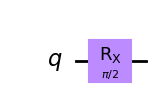

In [6]:
qc = QuantumCircuit(1)
qc.rx(pi/2,0)
qc.draw('mpl')

In [7]:
transpiled_qc = pm.run(qc)

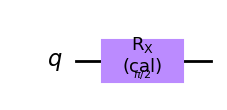

In [8]:
transpiled_qc.draw('mpl')

In [9]:
transpiled_qc.calibrations

{'rx': {((0,),
   (1.5707963267948966,)): ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=-0.30699583390497287, amp=0.0816751803481733, angle=0), DriveChannel(0)), name="rx(%.3f)", transform=AlignLeft())}}

In [10]:
from qiskit.quantum_info import Clifford
from qiskit.exceptions import QiskitError

try:
    interleaved_clifford = Clifford(transpiled_qc)
except QiskitError as err:
    raise QiskitError(
        f"Interleaved element {interleaved_element.name} could not be converted to Clifford."
    ) from err

In [11]:
interleaved_clifford

Clifford(array([[ True, False, False],
       [ True,  True,  True]]))

In [10]:
from qiskit_experiments.library.randomized_benchmarking.interleaved_rb_experiment import InterleavedRB

lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (0,1)

int_exp2 = InterleavedRB(
    transpiled_qc.to_gate(),[0], lengths, num_samples=num_samples, seed=seed,pm=pm,backend=backend)

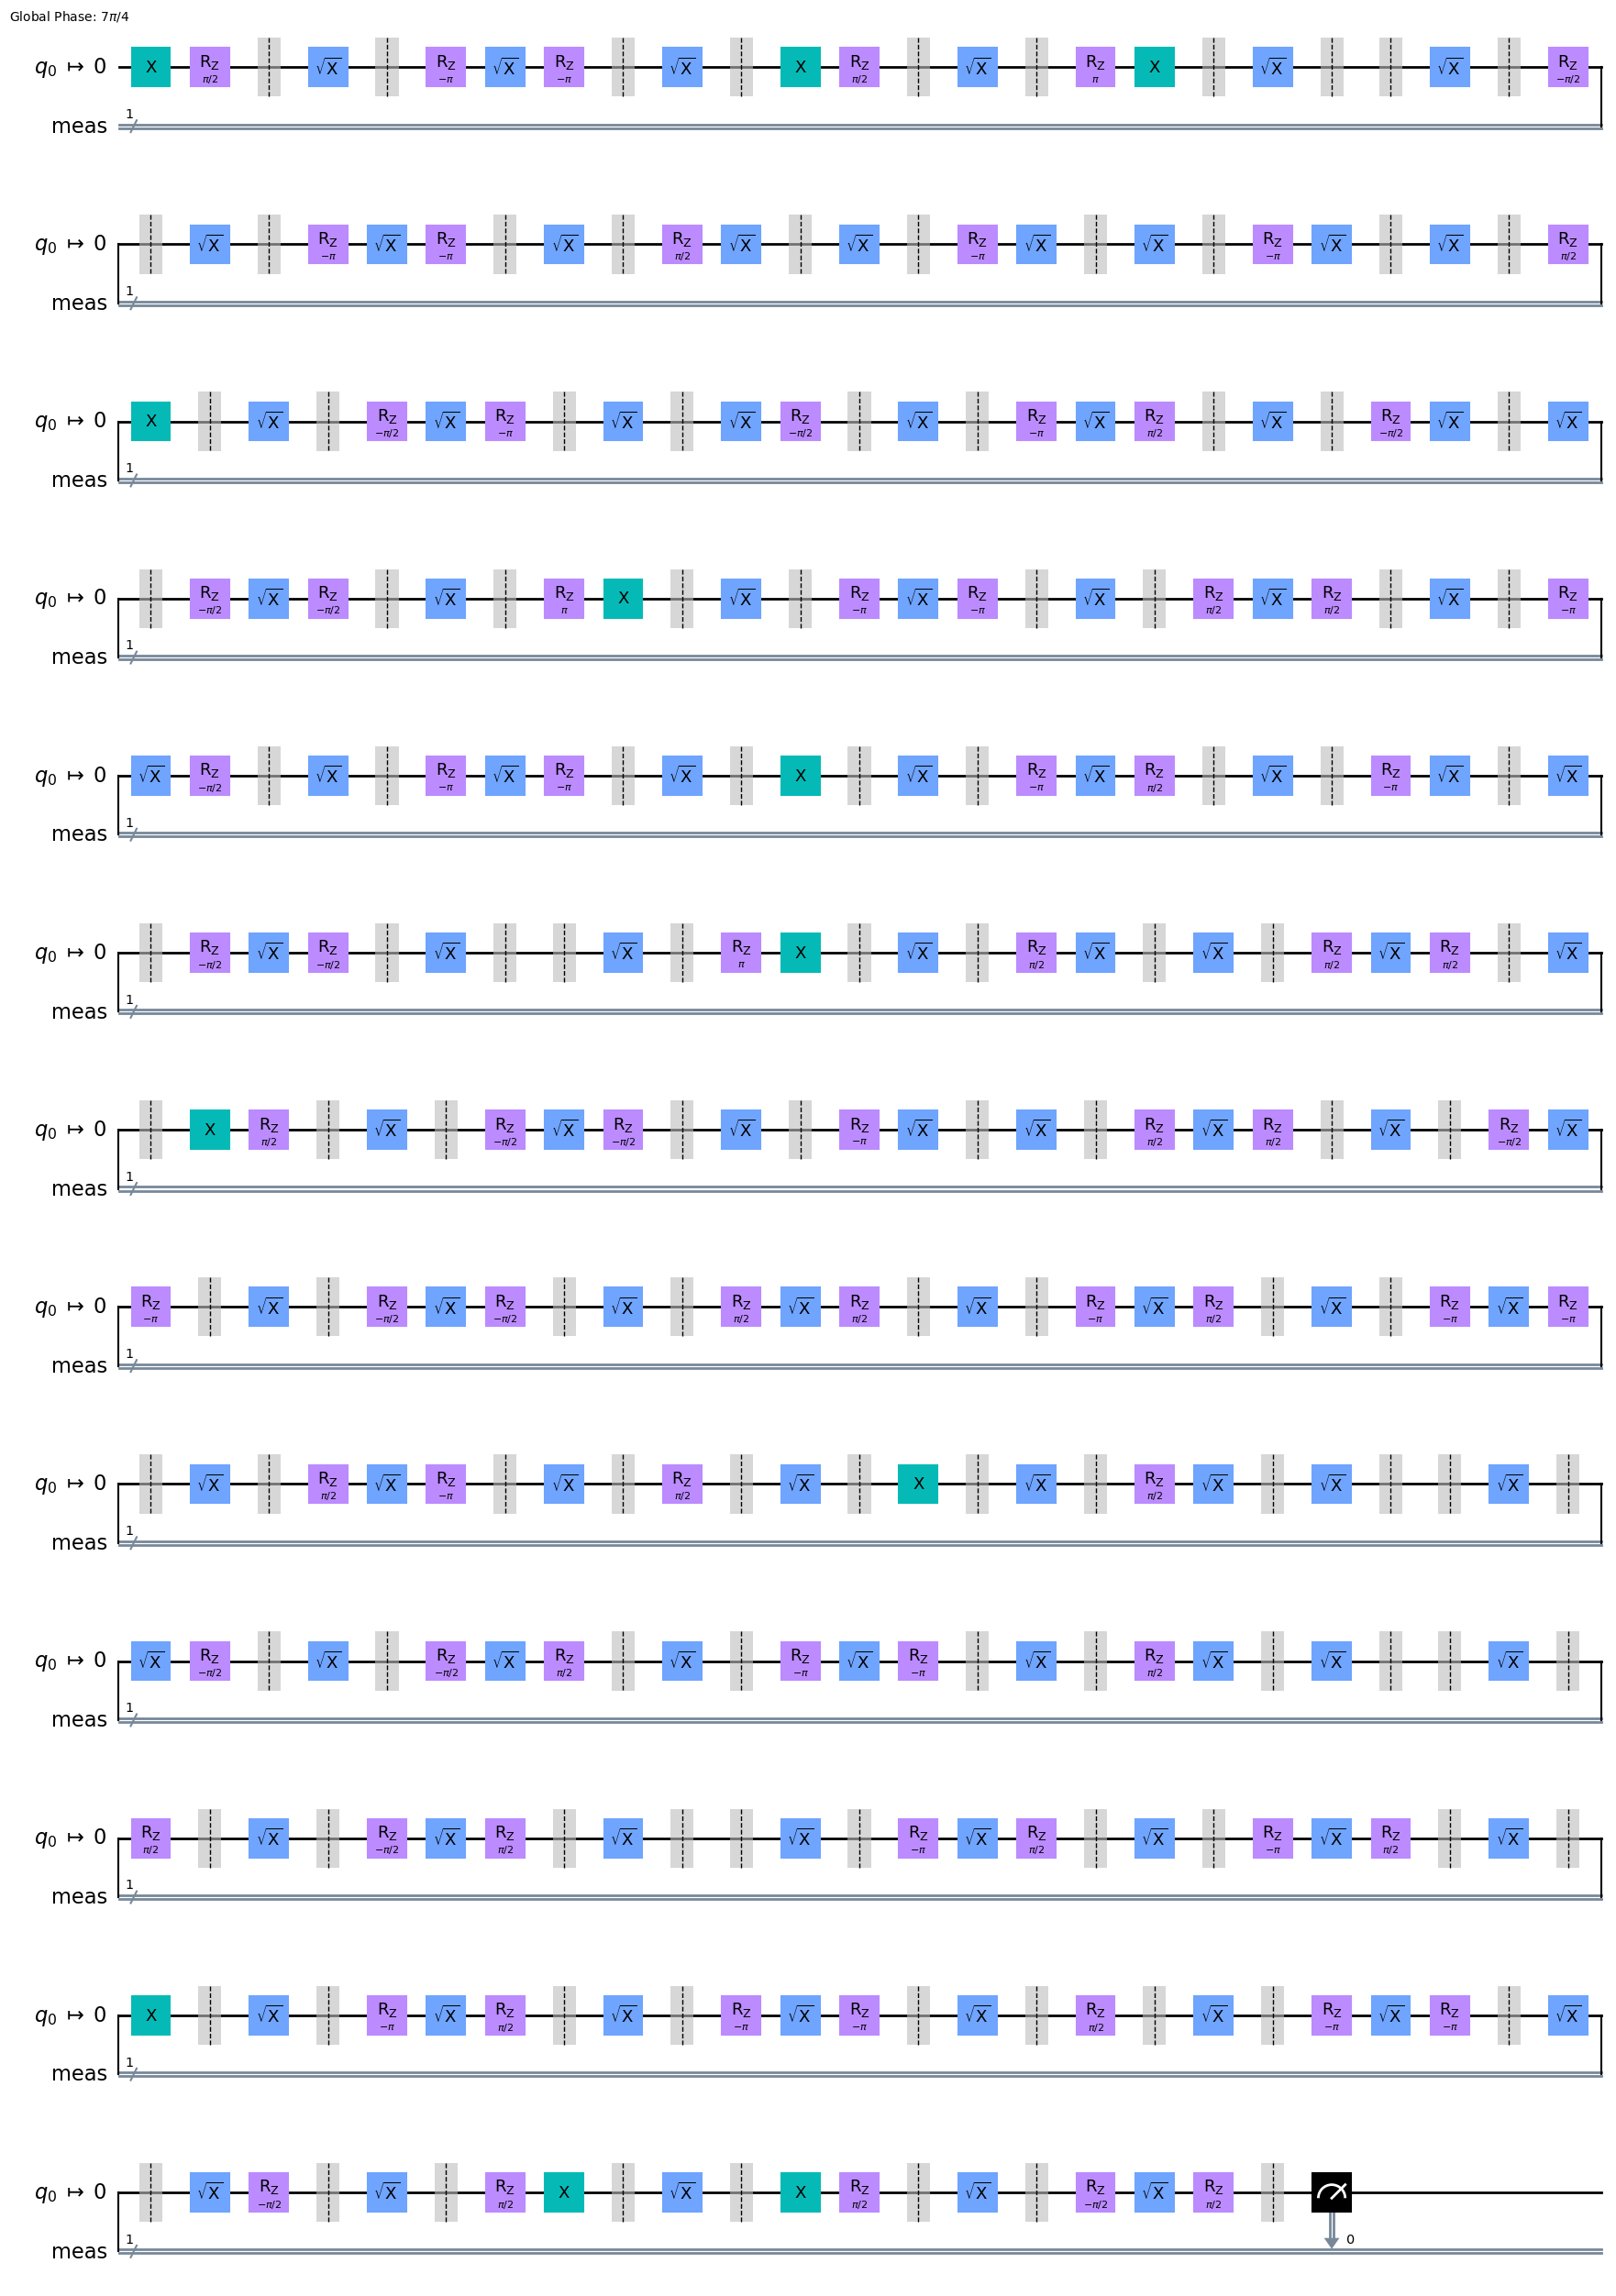

In [15]:
int_exp2.circuits()[5].draw('mpl',idle_wires=False)

In [13]:
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()

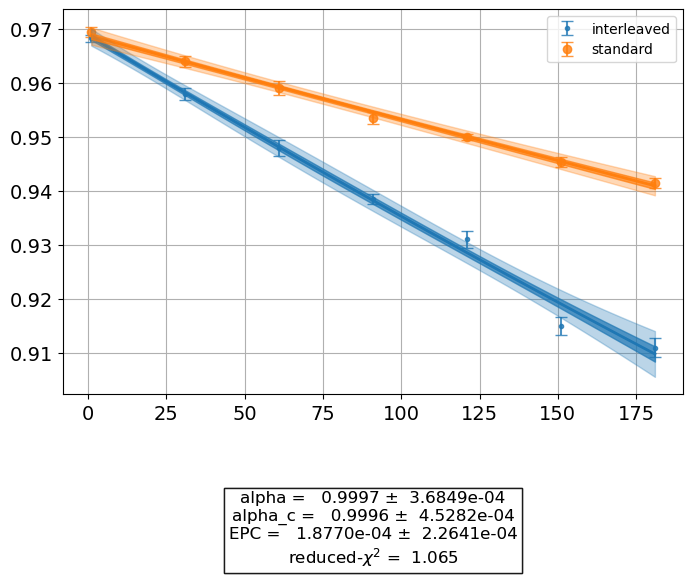

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 86
 - degree of freedom: 10
 - chi-square: 10.646472660482837
 - reduced chi-square: 1.0646472660482837
 - Akaike info crit.: 4.166398229274348
 - Bayesian info crit.: 6.722627547735382
 - init params:
  * a = 0.46912018705089226
  * alpha = 0.9996591319686136
  * b = 0.5
  * alpha_c = 0.9996157794243249
 - fit params:
  * a = 0.5026330830478343 ± 0.5677781463675828
  * alpha = 0.9996845018071916 ± 0.0003684886957747945
  * b = 0.46623388993727466 ± 0.5680169339021744
  * alpha_c = 0.9996245961183647 ± 0.0004528225630173277
 - correlations:
  * (a, b) = -0.9999996399431916
  * (alpha, b) = -0.999651033129398
  * (b, alpha_c) = -0.9995857296267792
  * (alpha, alpha_c) = 0.9990450231416801
  * (a, alpha_c) = 0.9

In [14]:
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)